In [1]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

Examples with predefined qubits:

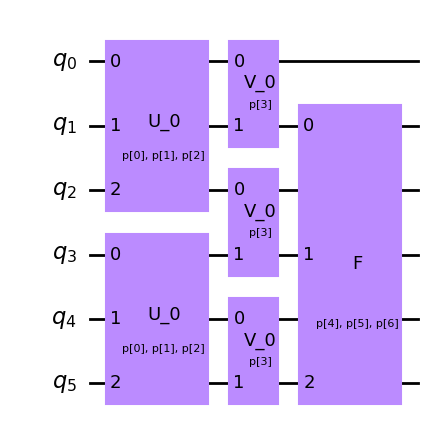

In [2]:
qcnn_with_qubits = qcnn_feature_map(6)

# Build a convolution layer with QuantumCircuit by qiskit like so:
x = ParameterVector("x",3)
convolution_gate = QuantumCircuit(3)
convolution_gate.crx(x[0],0,1)
convolution_gate.crx(x[1],0,2)
convolution_gate.crx(x[2],2,0)

qcnn_with_qubits.convolution(convolution_gate,var_param=False,entangled=False,closed=False)

# Build a pooling layer with QuantumCircuit by qiskit like so:
y = ParameterVector("y",1)
pooling_gate = QuantumCircuit(2)
pooling_gate.crx(y[0],0,1)

qcnn_with_qubits.pooling(pooling_gate,var_param=False)

# Build a fully connected layer with QuantumCircuit by qiskit like so:
z = ParameterVector("z",3)
fully_gate = QuantumCircuit(3)
fully_gate.cry(z[0],0,1)
fully_gate.cry(z[1],1,2)
fully_gate.cry(z[2],2,0)

qcnn_with_qubits.fully_connected(fully_gate)

# Get number of applications of the parameter vector by num_parameters:
param_vec = ParameterVector("p",qcnn_with_qubits.num_parameters)

qcnn_with_qubits.get_circuit([],param_vec).draw()
# qcnn_with_qubits.get_circuit([],param_vec).decompose().draw()


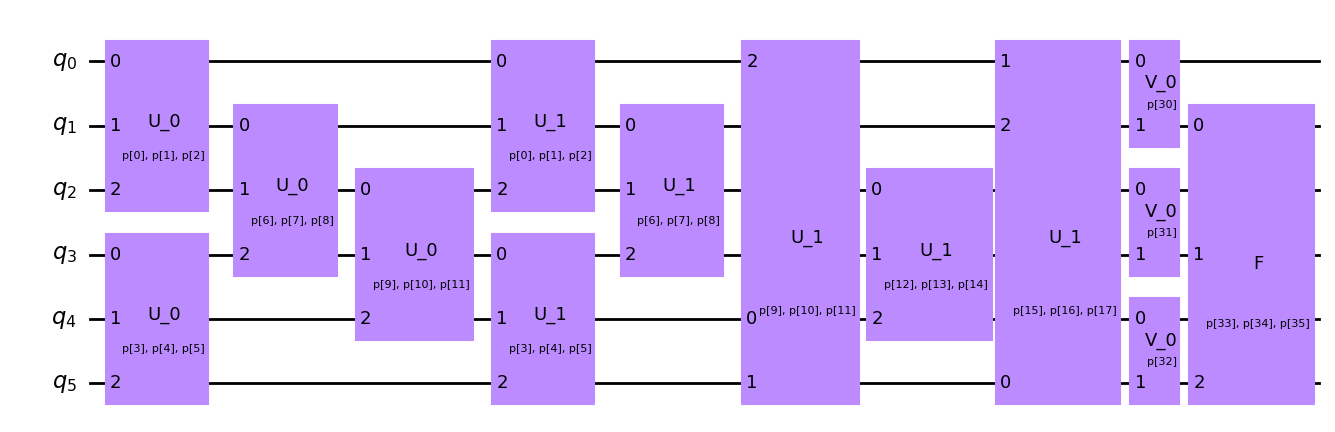

In [3]:
qcnn_with_qubits = qcnn_feature_map(6)

# You can variate the parameters per gate by setting var_param True. Also nearest neighbour entangling is possible with closed operations:
x = ParameterVector("x",3)
convolution_gate = QuantumCircuit(3)
convolution_gate.crx(x[0],0,1)
convolution_gate.crx(x[1],0,2)
convolution_gate.crx(x[2],2,0)

qcnn_with_qubits.convolution(convolution_gate,var_param=True,entangled=True,closed=False)

# If closed is true it also builds gates, which control the last and the first qubit simultaneously while skipping some qubits in between: 
qcnn_with_qubits.convolution(convolution_gate,var_param=True,entangled=True,closed=True)

# Pooling is possible with variation of parameters:
y = ParameterVector("y",1)
pooling_gate = QuantumCircuit(2)
pooling_gate.crx(y[0],0,1)

qcnn_with_qubits.pooling(pooling_gate,var_param=True)


z = ParameterVector("z",3)
fully_gate = QuantumCircuit(3)
fully_gate.cry(z[0],0,1)
fully_gate.cry(z[1],1,2)
fully_gate.cry(z[2],2,0)

qcnn_with_qubits.fully_connected(fully_gate)

param_vec = ParameterVector("p",qcnn_with_qubits.num_parameters)

qcnn_with_qubits.get_circuit([],param_vec).draw()

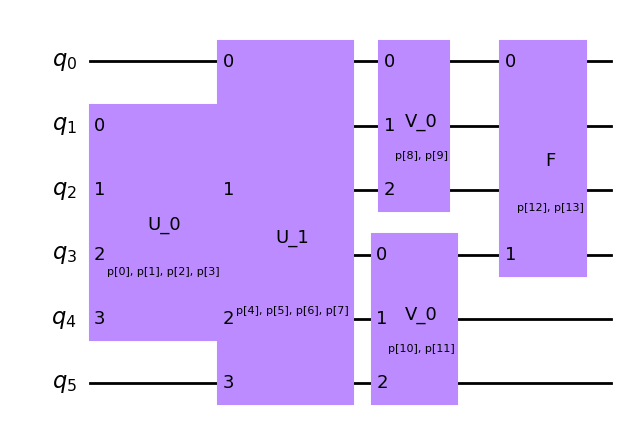

In [4]:
qcnn_with_qubits = qcnn_feature_map(6)

# It is also possible to set individual convolution layers by using the target_qubit option:
x = ParameterVector("x",4)
convolution_gate = QuantumCircuit(4)
convolution_gate.crx(x[0],0,1)
convolution_gate.crx(x[1],1,2)
convolution_gate.crx(x[2],2,3)
convolution_gate.crx(x[3],3,0)

# You can either set a number or a list of qubits, which the gate should apply to (make sure to use the right qubit number and the right amount of qubits in the list respectively).

# note: If target qubit is set, var_param, entangled options affect nothing. TODO: But if closed is true, the gate can jump on the first qubit after the last qubit (not implemented yet):
qcnn_with_qubits.convolution(convolution_gate,var_param=True,entangled=True,closed=False,target_qubit=1)

# Make sure to set the number of the target qubit not to high oder it will raise an index error:
#qcnn_with_qubits.convolution(convolution_gate,var_param=True,entangled=True,closed=False,target_qubit=4)

qcnn_with_qubits.convolution(convolution_gate,target_qubit=[0,2,4,5])



# With pooling layers target_qubit works a little bit different: 
# You can't put a list in it but when you chose a integer between 0 and the gate size - 1 you chose the remaining target qubit after the pooling operation (the last one is on default):
y = ParameterVector("y",2)
pooling_gate = QuantumCircuit(3)
pooling_gate.crx(y[0],2,0)
pooling_gate.crx(y[1],1,0)
qcnn_with_qubits.pooling(pooling_gate,var_param=True, target_qubit=0)


z = ParameterVector("z",2)
fully_gate = QuantumCircuit(2)
fully_gate.cry(z[0],0,1)
fully_gate.cry(z[1],1,0)
qcnn_with_qubits.fully_connected(fully_gate)



param_vec = ParameterVector("p",qcnn_with_qubits.num_parameters)

qcnn_with_qubits.get_circuit([],param_vec).draw()

Example without predefined qubits:

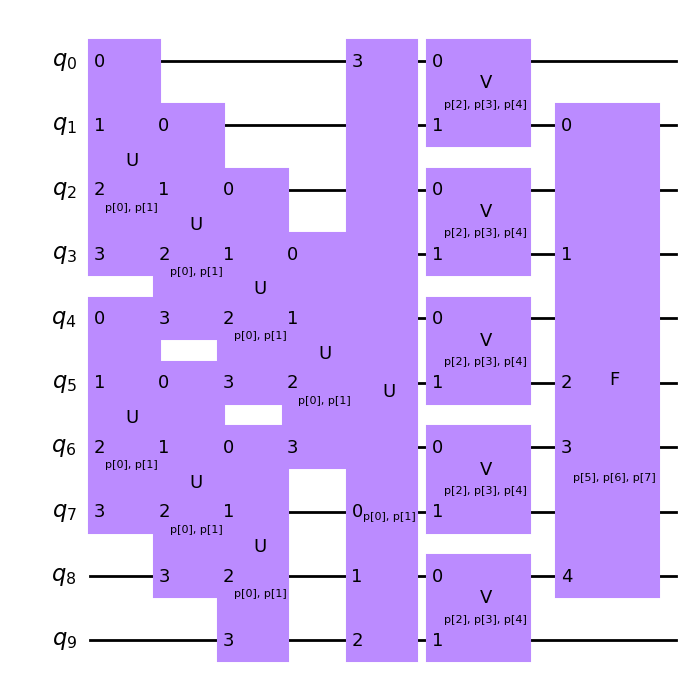

In [5]:
# You can build the feature map without knowing the number of qubits:
# In that case, everything is the same except you can't define a target qubit (not implemented yet).
qcnn_without_qubits = qcnn_feature_map()


z = ParameterVector("z", 8)
convolution_gate = QuantumCircuit(4)
convolution_gate.crx(z[0],0,1)
convolution_gate.cry(z[1],2,0)
#qcnn_without_qubits.convolution(convolution_gate, var_param=False,entangled=True,closed=True,target_qubit=1) # this will raise an error because closed is true and target qubit is set
qcnn_without_qubits.convolution(convolution_gate, var_param=False,entangled=True,closed=True)


y = ParameterVector("y",6)
pooling_gate = QuantumCircuit(2)
pooling_gate.cry(y[0],0,1)
pooling_gate.crz(y[1],1,0)
pooling_gate.cry(y[2],1,0)
qcnn_without_qubits.pooling(pooling_gate,var_param=False) 


x = ParameterVector("x", 3)
fully_gate = QuantumCircuit(5)
fully_gate.crx(x[0],0,1)
fully_gate.crx(x[2],0,2)
fully_gate.crx(x[1],1,2)
qcnn_without_qubits.fully_connected(fully_gate)

qcnn_param_vec = ParameterVector("p", qcnn_without_qubits.num_parameters)
qcnn_without_qubits.get_circuit([],qcnn_param_vec).draw()